In [ ]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep (3).csv


In [ ]:
data =pd.read_csv('HR_comma_sep.csv')

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.shape

(14999, 10)

In [ ]:
def train_validate_test_split(data, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(data.index)
    m = len(data.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train_dataset = data.iloc[perm[:train_end]]
    validate_dataset = data.iloc[perm[train_end:validate_end]]
    test_dataset = data.iloc[perm[validate_end:]]
    return train_dataset, validate_dataset, test_dataset

In [ ]:
train_dataset, validate_dataset, test_dataset = train_validate_test_split(data)

In [ ]:
train_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1378,0.80,0.87,5,240,6,0,1,0,technical,low
989,0.40,0.46,2,144,3,0,1,0,RandD,low
14153,0.88,0.74,3,273,10,0,0,0,sales,medium
12598,0.37,0.46,2,157,3,0,1,0,IT,low
8005,0.52,0.59,6,104,4,0,0,0,product_mng,medium


In [ ]:
validate_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
3003,0.75,0.66,5,177,2,0,0,0,sales,low
8103,0.58,0.63,4,190,2,0,0,0,sales,medium
11046,0.95,0.90,3,155,3,0,0,0,technical,medium
11372,0.98,0.74,3,185,3,0,0,0,sales,medium
12239,0.10,0.97,7,254,4,0,1,0,sales,low


In [ ]:
train_dataset.shape

(8999, 10)

In [ ]:
test_dataset.shape

(3001, 10)

In [ ]:
validate_dataset.shape

(2999, 10)

14999 records and 09 features and 1 target (left)

Satisfaction Level

Last evaluation

Number of projects

Average monthly hours

Time spent at the company

Whether they have had a work accident

Whether they have had a promotion in the last 5 years
Departments (column sales)

Salary

Whether the employee has left

In [ ]:
df = data.sample(frac =1,random_state=123) 

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


This is an extremely clean dataset. There are no NAs to worry about, though if there were it could be taken care of with some type of imputation (probably column dependent, e.g., NA on number_project might mean zero where as NA on satisfaction, it may make more sense to use the mean) on the numerics, and a new "unknown" level for the categoricals.

Beyond that, the rate of attrition appears to be 24%. So not low enough that we might need to worry about any kind of sampling.

the data is clean and no null value

In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [ ]:
df.shape

(14999, 10)

the new data consists of 1500 records

In [ ]:
df.rename(columns={'sales':'department',
                   'Work_accident':'work_accident','time_spend_company':'years_with_company',
                   'left':'left_company'},inplace=True)

In [ ]:
df.left_company.unique()

array([0, 1])

In [ ]:
left_company = len(df[df.left_company == 1])
left_company

3571

In [ ]:
retained = len(df[df.left_company == 0])
retained

11428

6843 retained and 2156 left for this dataset 

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,left_company,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


mean = 50% means that is no outliers 

In [ ]:
df_dup = df[df.duplicated(keep="last")]
df_dup

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,left_company,promotion_last_5years,department,salary
14679,0.90,0.92,5,245,5,0,1,0,sales,low
11718,0.63,0.85,4,182,3,1,0,0,sales,high
10889,0.76,0.57,3,148,3,1,0,0,support,low
1896,0.39,0.49,2,127,3,0,1,0,IT,medium
603,0.83,0.90,5,245,5,0,1,0,product_mng,low
...,...,...,...,...,...,...,...,...,...,...
14425,0.40,0.53,2,151,3,0,1,0,IT,low
10832,0.47,0.53,3,111,4,0,0,0,RandD,medium
11308,0.83,0.93,3,247,2,0,0,0,hr,low
11843,0.62,0.61,3,266,2,0,0,0,management,high


In [ ]:
df_dup.shape

(3008, 10)

So we have 37 rows which are duplicates. We will drop these duplicate rows before proceeding furthur.

In [ ]:
data1 = df.drop_duplicates()
data1.shape

(11991, 10)

In [ ]:
data1.groupby('left_company').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,promotion_last_5years
left_company,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


to see the percentage of each independent for each feature

above table shows that those who left that has 44% satisfaction and they are worked more hours 207 but they are not promoted in last 5 years so that's why they are leaving the job

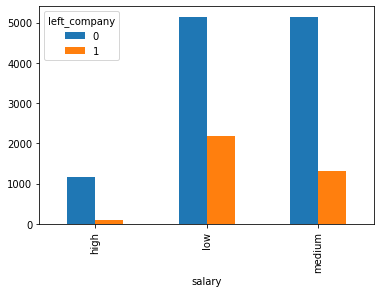

In [ ]:
pd.crosstab(df.salary, df.left_company).plot(kind='bar')

Here above results shows that employee with high salaries are likely to to not leave the company

In [ ]:

df['department'].unique()

array(['sales', 'support', 'RandD', 'technical', 'marketing',
       'accounting', 'IT', 'hr', 'product_mng', 'management'],
      dtype=object)

Here we are printing all the unique values in sales columns

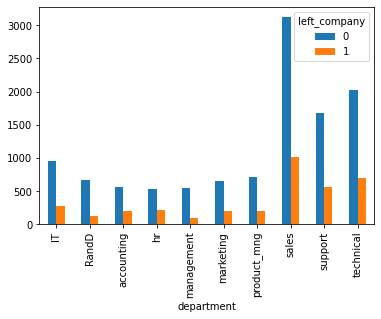

In [ ]:
pd.crosstab(df.department, df.left_company).plot(kind="bar")

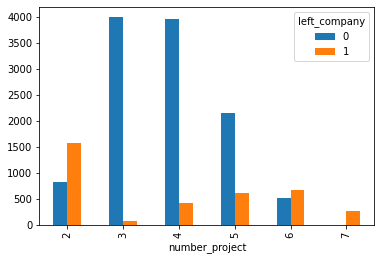

In [ ]:
pd.crosstab(df.number_project, df.left_company).plot(kind="bar")

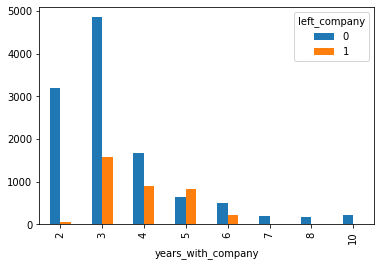

In [ ]:
pd.crosstab(df.years_with_company, df.left_company).plot(kind="bar")

left_company     0     1
salary                  
high          1155    82
low           5144  2172
medium        5129  1317


salary
high      1237
low       7316
medium    6446
dtype: int64


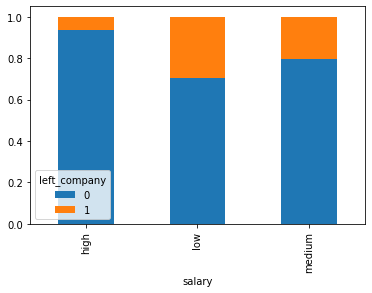

In [ ]:
q = pd.crosstab(df.salary, df.left_company)
print(q)
print('\n')
print(q.sum(1))
q.div(q.sum(1), axis = 0).plot(kind='bar', stacked = True)
plt.show()

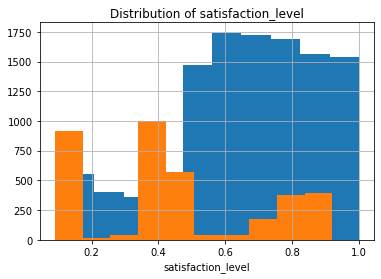

In [ ]:
p1 = df[df.left_company==0].satisfaction_level.hist()
p2 = df[df.left_company==1].satisfaction_level.hist()
plt.xlabel('satisfaction_level')
plt.title('Distribution of satisfaction_level')
plt.show()

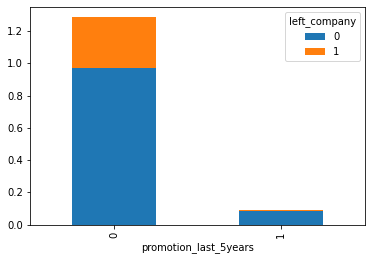

In [ ]:
p = pd.crosstab(df.promotion_last_5years, df.left_company)
p.div(q.sum(0), axis = 0).plot(kind='bar', stacked = True)
plt.show()

In [ ]:
satisfaction_by_dept=df.groupby('department').mean()
satisfaction_by_dept.sort_values(by="satisfaction_level", ascending=True, inplace=True)
satisfaction_by_dept

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,left_company,promotion_last_5years
department,,,,,,,,
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
technical,0.607897,0.721099,3.877941,202.497426,3.411397,0.140074,0.256250,0.010294
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307


Text(0.5, 1.0, 'Mean Satisfaction Level of each department')

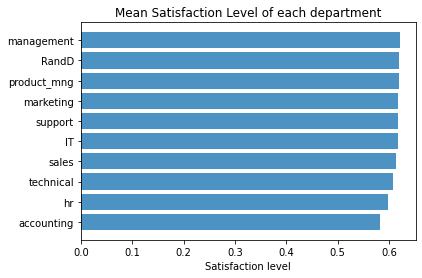

In [ ]:
y_pos = np.arange(len(satisfaction_by_dept.index))

plt.barh(y_pos, satisfaction_by_dept['satisfaction_level'], align='center', alpha=0.8)
plt.yticks(y_pos, satisfaction_by_dept.index)

plt.xlabel('Satisfaction level')
plt.title('Mean Satisfaction Level of each department')

In [ ]:
data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,left_company,promotion_last_5years,department,salary
6958,0.54,0.67,3,154,2,0,0,0,sales,high
7534,0.72,0.52,3,143,4,1,0,0,support,low
2975,0.95,0.61,3,267,2,0,0,0,RandD,low
3903,0.78,0.79,3,203,2,0,0,0,sales,low
8437,0.60,0.40,3,146,4,1,0,0,technical,low


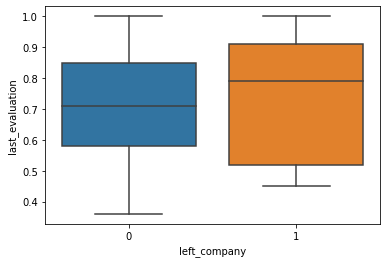

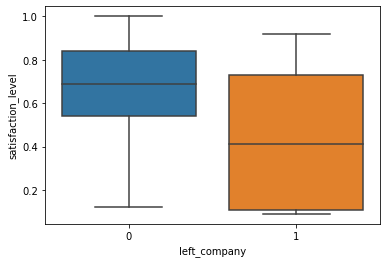

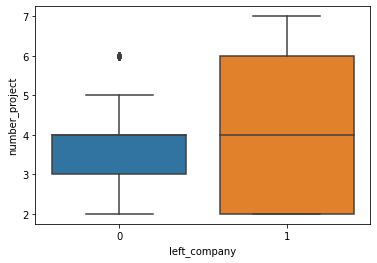

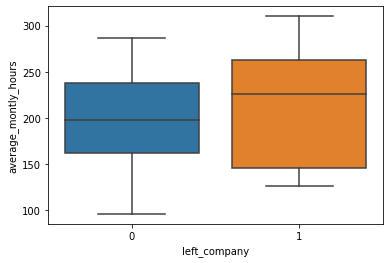

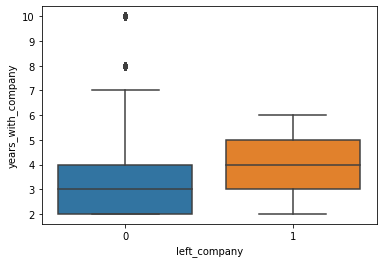

In [ ]:
sns.boxplot(data1.left_company,data1.last_evaluation)
plt.show()

sns.boxplot(data1.left_company,data1.satisfaction_level)
plt.show()

sns.boxplot(data1.left_company,data1.number_project)
plt.show()

sns.boxplot(data1.left_company,data1.average_montly_hours)
plt.show()


sns.boxplot(data1.left_company,data1.years_with_company)
plt.show()







In [ ]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,left_company,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
years_with_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left_company,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


df.corr() compute pairwise correlation of columns. Correlation shows how each pair of variables is related to each other. Positive values indicate positive correlation. Negative values indicates negative correlation.

The magnitude of the value indicates the level/strength of correlation (0 <= |x| <= 1).

Text(0.5, 1.0, 'Correlation between different fearures')

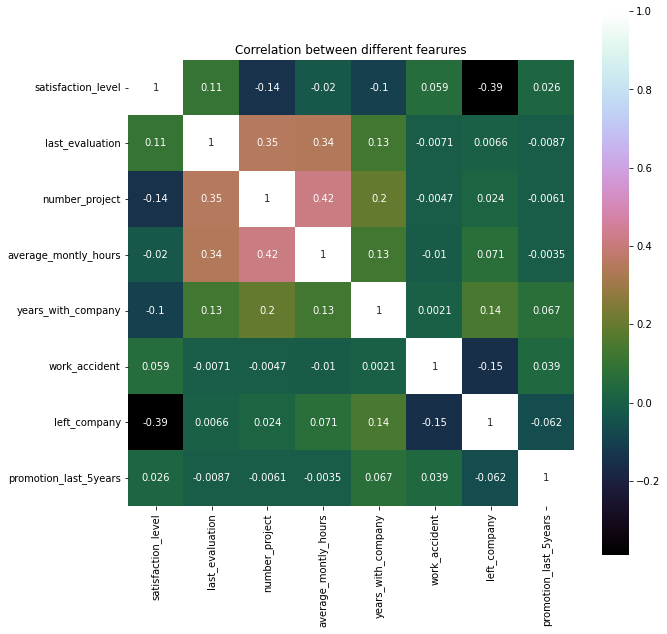

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
%load_ext rpy2.ipython
%qtconsole

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
import numpy as np
import pandas as pd
import os
import sys
import warnings
import math

print(os.getcwd())

/content


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'years_with_company', 'work_accident',
       'left_company', 'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.

1-Employees with low to medium salaries are more likely to leave the company. It is observed that the employees with high salaries are least likely to leave the company.

2-The employee turnover is high in the departments Sales, techincal, Support. The Management departmnet has the least employee turnover.

3- The employee turonver is high for employees with 2,6 and 7 projects. Majority of the employees with 3,4,5 projects did not leave the company. All the employees with 7 projects left the company.

4- Employees with low and high performance tend to leave the company more. The sweet spot for employees that stayed is within 0.6-0.8 evaluation.

5- Employees who had less hours of work (150hours or less) left the company more. Employees who had too many hours of work (250 or more) left the company Employees who left generally were underworked or overworked.

6- Employees who had really low satisfaction levels (0.2 or less) left the company more Employees who had low satisfaction levels (0.3~0.5) left the company more Employees who had really high satisfaction levels (0.7 or more) left the company more.

7- More than half of the employees with 4 and 5 years left the company.

8- Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts. There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left.

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,left_company,promotion_last_5years,department,salary
6958,0.54,0.67,3,154,2,0,0,0,sales,high
7534,0.72,0.52,3,143,4,1,0,0,support,low
2975,0.95,0.61,3,267,2,0,0,0,RandD,low
3903,0.78,0.79,3,203,2,0,0,0,sales,low
8437,0.60,0.40,3,146,4,1,0,0,technical,low


In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
years_with_company         int64
work_accident              int64
left_company               int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [ ]:
var_numeric=['satisfaction_level','last_evaluation', 'number_project','average_montly_hours',
'years_with_company','work_accident','promotion_last_5years' ]

In [ ]:
var_categorical=['salary','department']

In [ ]:
q3 = df[var_numeric].quantile(0.75)
q1 = df[var_numeric].quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
satisfaction_level        0.38
last_evaluation           0.31
number_project            2.00
average_montly_hours     89.00
years_with_company        1.00
work_accident             0.00
promotion_last_5years     0.00
dtype: float64


In [ ]:
data_out = df[~((df[var_numeric] < (q1 - 1.5 * iqr)) |(df[var_numeric] > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(df.shape[0] - data_out.shape[0]))

3407 points are outliers based on IQR


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
df.salary = le.fit_transform(df.salary)
df.department = le.fit_transform(df.department)


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,left_company,promotion_last_5years,department,salary
6958,0.54,0.67,3,154,2,0,0,0,7,0
7534,0.72,0.52,3,143,4,1,0,0,8,1
2975,0.95,0.61,3,267,2,0,0,0,1,1
3903,0.78,0.79,3,203,2,0,0,0,7,1
8437,0.60,0.40,3,146,4,1,0,0,9,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[var_numeric] = scaler.fit_transform(df[var_numeric])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,left_company,promotion_last_5years,department,salary
6958,-0.292948,-0.269343,-0.651538,-0.942110,-1.026126,-0.411165,0,-0.147412,7,0
7534,0.431041,-1.145699,-0.651538,-1.162368,0.343655,2.432112,0,-0.147412,8,1
2975,1.356139,-0.619886,-0.651538,1.320540,-1.026126,-0.411165,0,-0.147412,1,1
3903,0.672371,0.431741,-0.651538,0.039039,-1.026126,-0.411165,0,-0.147412,7,1
8437,-0.051619,-1.846783,-0.651538,-1.102298,0.343655,2.432112,0,-0.147412,9,1


In [ ]:
x=df.drop(['left_company'],axis=1) 
y=df['left_company']  

In [ ]:
df['left_company'].value_counts()

0    11428
1     3571
Name: left_company, dtype: int64

the data is not balanced

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_balanced,Y_balanced=os.fit_resample(x,y)

Original dataset shape Counter({0: 11428, 1: 3571})
Resampled dataset shape Counter({0: 11428, 1: 11428})


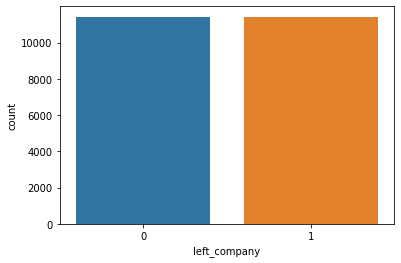

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(Y_balanced)))
sns.countplot(Y_balanced)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_balanced,Y_balanced,test_size=.20,random_state=0)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('Y_train:',Y_train.shape)
print('Y_test:',Y_test.shape)

X_train: (18284, 9)
X_test: (4572, 9)
Y_train: (18284,)
Y_test: (4572,)


In [ ]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,promotion_last_5years,department,salary
11275,0.310376,0.314894,-0.651538,0.619719,-1.026126,-0.411165,-0.147412,7,1
14232,1.155031,0.548588,1.782438,1.440681,1.028546,-0.411165,-0.147412,9,2
20141,-2.062701,1.015978,2.593763,2.141502,0.343655,-0.411165,-0.147412,9,2
8505,0.712593,-0.736733,0.159788,-1.242462,-0.341235,-0.411165,6.783716,4,1
4981,0.069046,1.308097,-0.651538,-0.581688,-0.341235,-0.411165,-0.147412,4,2


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))

0.7633450010938525
0.7626859142607174


[[1716  592]
 [ 493 1771]]
0.7626859142607174
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      2308
           1       0.75      0.78      0.77      2264

    accuracy                           0.76      4572
   macro avg       0.76      0.76      0.76      4572
weighted avg       0.76      0.76      0.76      4572

ROC_AUC Score: 0.7631465514351228


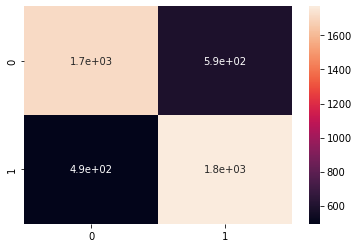

In [ ]:
print(confusion_matrix(Y_test, lr.predict(X_test))) # known x predicted
print(accuracy_score(Y_test, lr.predict(X_test)))
print(classification_report(Y_test, lr.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test, lr.predict(X_test)),annot=True)

acc_lr=accuracy_score(Y_test,lr.predict(X_test))
recall_lr=recall_score(Y_test,lr.predict(X_test))
precision_lr=precision_score(Y_test,lr.predict(X_test))
f1score_lr=f1_score(Y_test,lr.predict(X_test))

AUC_lr=roc_auc_score(lr.predict(X_test),Y_test)
print("ROC_AUC Score:",AUC_lr)

In [ ]:
eval_df = pd.DataFrame(
    {
     'Predictions': lr.predict(X_test),
     'Actuals': Y_test
    }
)

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(lr.coef_[0],3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)

                       importance
feature                          
years_with_company          0.666
average_montly_hours        0.261
last_evaluation             0.246
department                  0.039
salary                     -0.007
promotion_last_5years      -0.309
work_accident              -0.519
number_project             -0.548
satisfaction_level         -1.123


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
print(rf.score(X_train, Y_train))
print(rf.score(X_test, Y_test))

1.0
0.9978127734033246


We have found the silver bullet! It would appear that random forest does a really good job of mapping this data to its outcome vector. 96% of all attriters have been identified, and 99% of the time we said someone would attrite, they did.

[[2306    2]
 [   8 2256]]
0.9978127734033246
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2308
           1       1.00      1.00      1.00      2264

    accuracy                           1.00      4572
   macro avg       1.00      1.00      1.00      4572
weighted avg       1.00      1.00      1.00      4572

ROC_AUC Score: 0.9978285217335385


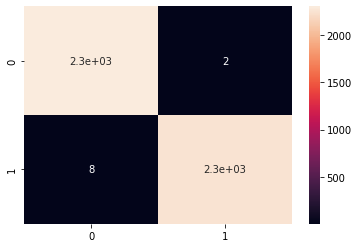

In [ ]:
print(confusion_matrix(Y_test, rf.predict(X_test))) # known x predicted
print(accuracy_score(Y_test, rf.predict(X_test)))
print(classification_report(Y_test, rf.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test, rf.predict(X_test)),annot=True)

acc_rf=accuracy_score(Y_test,rf.predict(X_test))
recall_rf=recall_score(Y_test,rf.predict(X_test))
precision_rf=precision_score(Y_test,rf.predict(X_test))
f1score_rf=f1_score(Y_test,rf.predict(X_test))

AUC_rf=roc_auc_score(rf.predict(X_test),Y_test)
print("ROC_AUC Score:",AUC_rf)

In [ ]:
eval_df = pd.DataFrame(
    {
     'Predictions': rf.predict(X_test),
     'Actuals': Y_test
    }
)

Let's figure out what features are important so that we can use those to get better at improving retention.

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)

                       importance
feature                          
satisfaction_level          0.282
years_with_company          0.241
number_project              0.161
average_montly_hours        0.158
last_evaluation             0.126
department                  0.015
salary                      0.009
work_accident               0.007
promotion_last_5years       0.001


#the SVM Classifier

Accuracy: 0.9306649168853893
ROC_AUC Score: 0.9308432950503391
[[2169  139]
 [ 178 2086]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2308
           1       0.94      0.92      0.93      2264

    accuracy                           0.93      4572
   macro avg       0.93      0.93      0.93      4572
weighted avg       0.93      0.93      0.93      4572



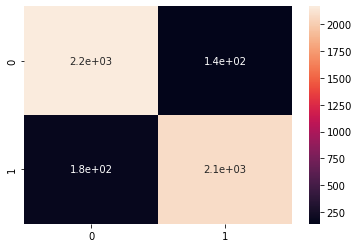

In [ ]:
from sklearn import svm
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

# build model
svm_model = svm.SVC()
# fit classifiers
svm_model.fit(X_train, Y_train)
# Prediction
svm_pred = svm_model.predict(X_test)
# model Evaluation
print("Accuracy:",accuracy_score(Y_test, svm_pred))
# Classification Report & Confusion matrix

acc_svm=accuracy_score(Y_test,svm_pred)
recall_svm=recall_score(Y_test,svm_pred)
precision_svm=precision_score(Y_test,svm_pred)
f1score_svm=f1_score(Y_test,svm_pred)

AUC_svm=roc_auc_score(svm_pred,Y_test)
print("ROC_AUC Score:",AUC_svm)


print(confusion_matrix(Y_test, svm_pred))
print(classification_report(Y_test, svm_model.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test, svm_model.predict(X_test)),annot=True)


In [ ]:
models=['Logistic regression','Randomforest','SVM Classifier']
data={"Accuracy":[acc_lr,acc_rf,acc_svm],"Recall":[recall_lr,recall_rf,recall_svm],"Precision":[precision_lr,precision_rf,precision_svm],
    'f1_score':[f1score_lr,f1score_rf,f1score_svm],"ROC_AUC":[AUC_lr,AUC_rf,AUC_svm]}
result=pd.DataFrame(data=data,index=models)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.762686,0.782244,0.749471,0.765507,0.763147
Randomforest,0.997813,0.996466,0.999114,0.997789,0.997829
SVM Classifier,0.930665,0.921378,0.937528,0.929383,0.930843
